In [30]:
import numpy as np
import math
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

# Data Preprocessing

In [31]:
df = pd.read_csv('all_stocks_5yr.csv' )
nrow, ncol = df.shape
print(f'There are {nrow} rows and {ncol} columns')
company_name = df['Name'].unique()[:25].tolist()


There are 619040 rows and 7 columns


In [32]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

# Subset selecting

Since all stocks don't have same number of data points, 
25 first stocks which have a same number of data poitns have been selected.

In [33]:
df_sub = df[:25*1259]
nrow1, ncol1 = df_sub.shape
print(f'There are {nrow1} rows and {ncol1} columns')
df_sub

There are 31475 rows and 7 columns


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.1200,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.0100,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.5100,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.9400,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.9600,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
31470,2018-02-01,110.92,111.5700,108.96,109.20,1962034,ALB
31471,2018-02-02,108.52,109.1200,104.92,105.51,2738581,ALB
31472,2018-02-05,104.28,109.9000,102.85,105.15,3837970,ALB
31473,2018-02-06,103.51,108.5199,103.31,107.54,2903894,ALB


# Run the model for one stock


Since we have 5 years of data points, we split it into 4 years and 11 months as the traning set and 1 month as the testing set.

In [34]:
df_gg = []
df_gg  =df[(df['Name'] == 'GOOGL')].reset_index()
gg_train = df_gg[:1259-21]
gg_test = df_gg[1259-21: 1259]
nrow2, ncol2 = df_gg.shape
print(f'There are {nrow2} rows and {ncol2} columns')

gg_test

There are 1259 rows and 8 columns


,index,date,open,high,low,close,volume,Name
1238,251546,2018-01-09,1118.44,1118.44,1108.20,1112.79,1340381,GOOGL
1239,251547,2018-01-10,1107.00,1112.78,1103.98,1110.14,1036655,GOOGL
1240,251548,2018-01-11,1112.31,1114.85,1106.48,1112.05,1121216,GOOGL
1241,251549,2018-01-12,1110.10,1131.30,1108.01,1130.65,1929306,GOOGL
1242,251550,2018-01-16,1140.31,1148.88,1126.66,1130.70,1823100,GOOGL
1243,251551,2018-01-17,1136.36,1139.32,1123.49,1139.10,1391510,GOOGL
1244,251552,2018-01-18,1139.35,1140.59,1124.46,1135.97,1374873,GOOGL
1245,251553,2018-01-19,1138.03,1143.78,1132.50,1143.50,1527554,GOOGL
1246,251554,2018-01-22,1143.82,1166.88,1141.82,1164.16,1477520,GOOGL
1247,251555,2018-01-23,1170.62,1178.51,1167.25,1176.17,1956865,GOOGL


# Data visualization

Compare log values plot vs normal values plot

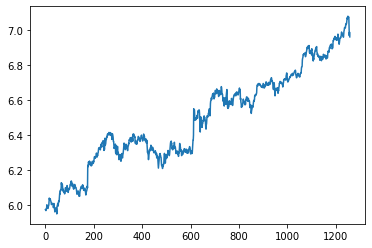

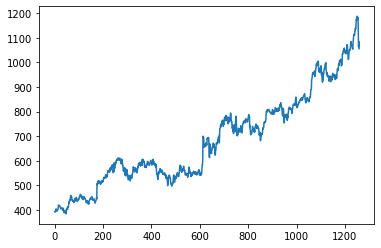

In [35]:
gglog = np.log(df_gg['close'])
plt.plot(gglog)
plt.show()
plt.plot(df_gg['close'])

Compare high points and low points

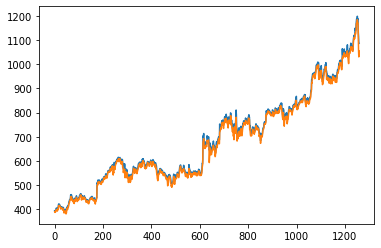

In [36]:
T = len(df_gg)
t = np.arange(0, T)
plt.plot(t,df_gg['high'],t, df_gg['low'])

Relation between parameters

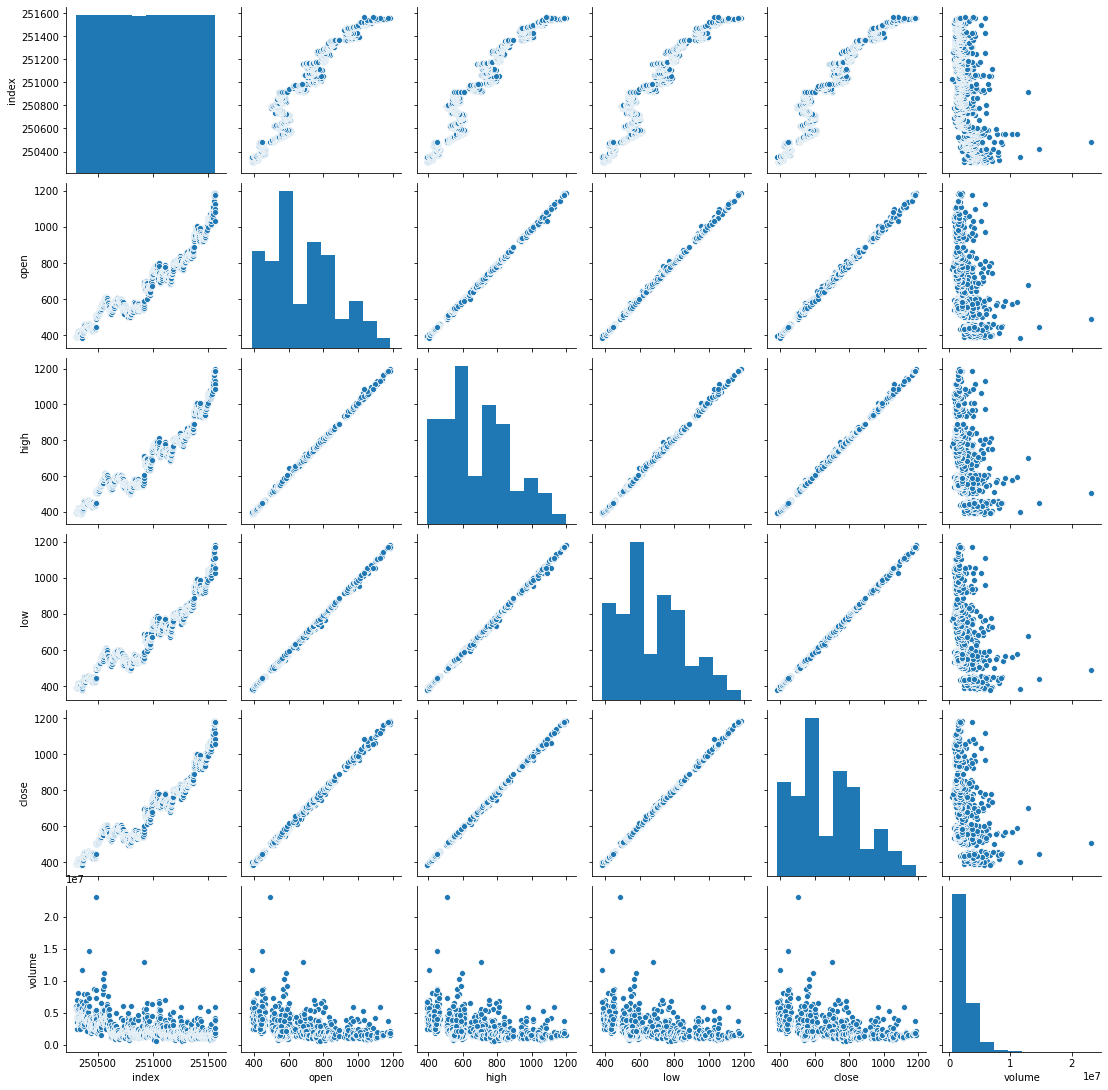

In [37]:
sns.pairplot(df_gg)

Auto correlation plot

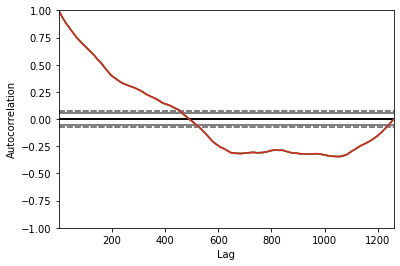

In [38]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_gg['high'])
autocorrelation_plot(df_gg['close'])
autocorrelation_plot(df_gg['low'])
autocorrelation_plot(df_gg['open'])

# Implement ARIMA

In [39]:
from statsmodels.tsa.arima.model import ARIMA

30 different combination of configration for Arima's order has been tested and (2,2,2) has been found as the best configration

In [40]:
model = ARIMA(gg_train['close'], order = (3,2,1))
model_fit = model.fit()

In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1238
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -4466.174
Date:                Wed, 28 Apr 2021   AIC                           8942.347
Time:                        17:30:59   BIC                           8967.945
Sample:                             0   HQIC                          8951.976
                               - 1238                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0456      0.025      1.835      0.067      -0.003       0.094
ar.L2          0.0159      0.027      0.583      0.560      -0.037       0.069
ar.L3         -0.0440      0.024     -1.853      0.064      -0.091       0.003
ma.L1         -1.0000      0.284     -3.519      0.000      -1.557      -0.443
sigma2        80.0953     22.735      3.523      0.000      35.536     124.655
===================================================================================
Ljung-Box (Q):                       53.97   Jarque-Bera (JB):             11387.51
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
len(gg_train['close'])

1238

,0
0,393.077700
1,-198.015819
2,0.586155
3,2.226891
4,2.777904
...,...
1233,19.218105
1234,16.717950
1235,2.423025
1236,14.359863


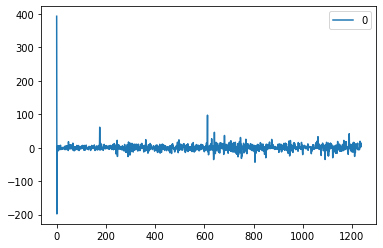

In [43]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals

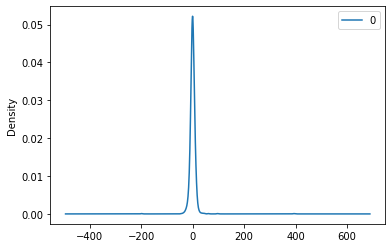

In [44]:
residuals.plot(kind='kde')

Text(0.5, 1.0, 'Google stock price')

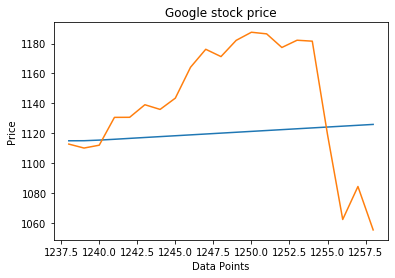

In [50]:
prid = model_fit.predict(1238, 1238+20)
plt.show()
plt.plot(prid)
plt.plot(gg_test['close'])
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Google stock price')

# Implementing ARIMA for 25 first Stocks

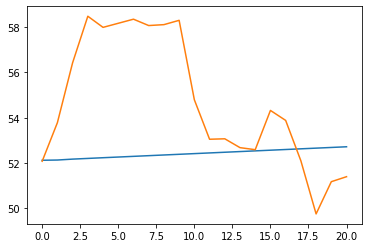

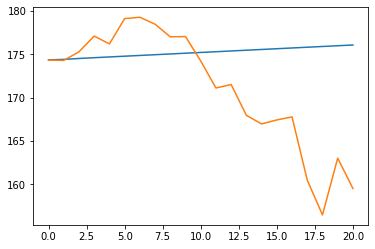

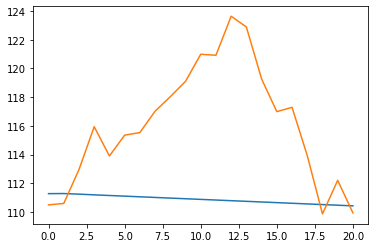

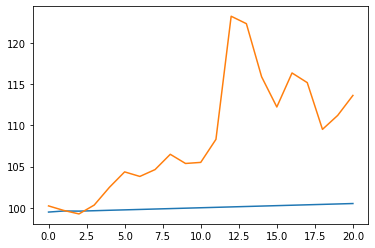

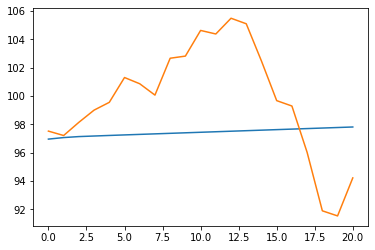

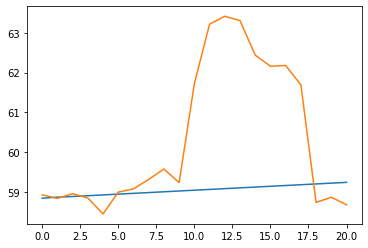

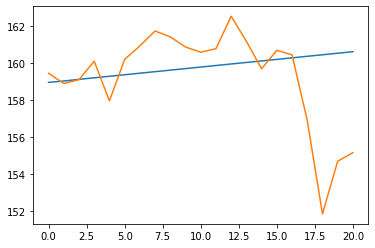

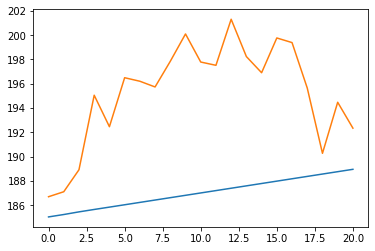

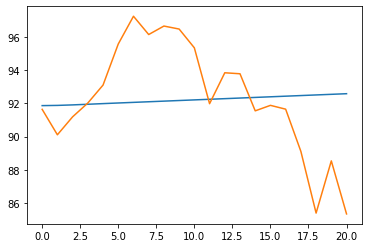

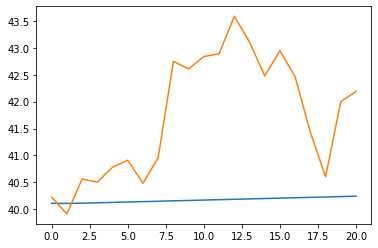

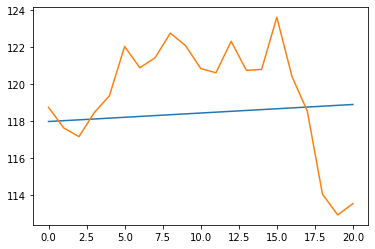

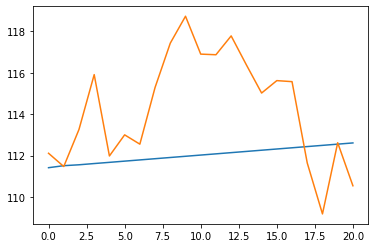

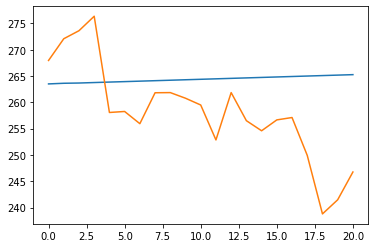

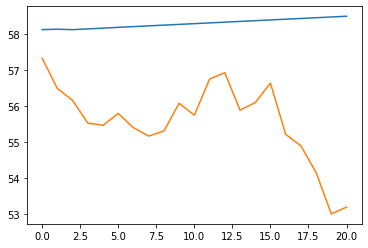

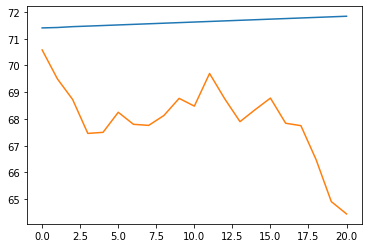

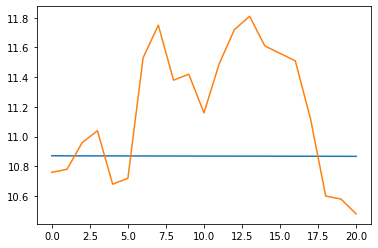

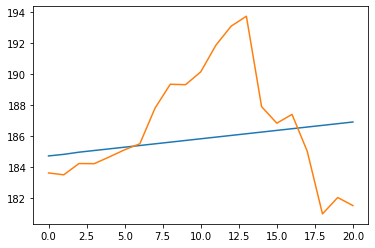

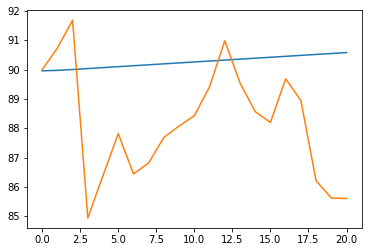

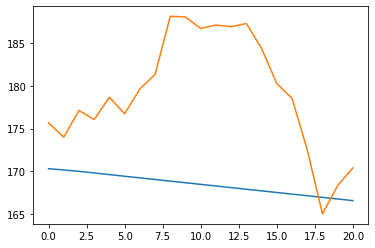

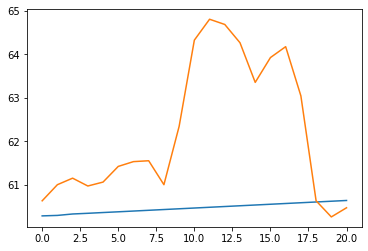

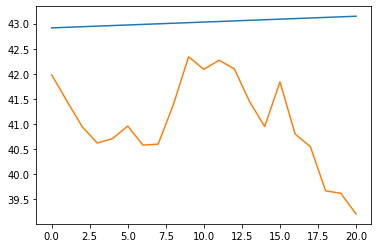

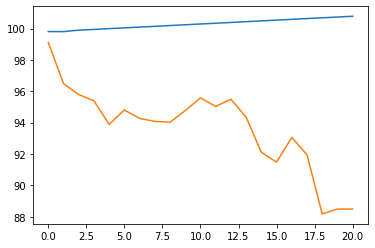

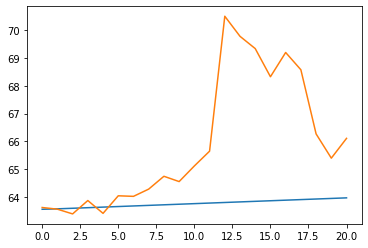

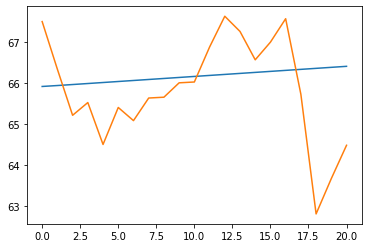

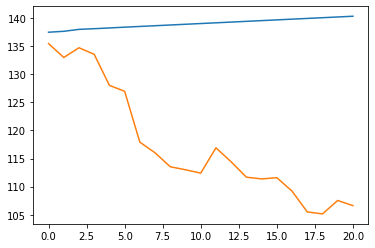

In [46]:
output=[]
df_last=[]
for k in range(25):
    df_c = df[k*1259:(k+1)*1259]
    df_last.append(df[((k+1)*1259)-22:((k+1)*1259)-21].reset_index()['close'])
    test =[]
    size = int(len(df_c) * (1259-21)/1259)
    train = df_c['close'].iloc[:size]
    test = df_c[size:len(df_c)].reset_index()['close']
    General_model = ARIMA(train, order=(3,2,1))
    modelfit = General_model.fit()
    general_prid = modelfit.predict(1238, 1238+20).reset_index()[0]
    output.append(general_prid[20])
    plt.show()
    plt.plot(general_prid)
    plt.plot(test)

In [47]:
from pandas import DataFrame
last_data =np.array(df_last).reshape(len(df_last))
df_final = DataFrame(last_data,columns=['Last price'], index=company_name)
df_final['Predicted Price']= output
df_final

,Last price,Predicted Price
AAL,52.13,52.718552
AAPL,174.35,176.064432
AAP,111.39,110.421378
ABBV,99.49,100.527025
ABC,96.90,97.810946
ABT,58.82,59.234920
ACN,158.93,160.627416
ADBE,185.04,188.954101
ADI,91.83,92.580737
ADM,40.09,40.240136


In [48]:
df_final.to_csv('ARIMA_final.csv', index=False)